# **Read and Prepare Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/udara_jkt.csv')
df

,pm10,pm25,so2,co,o3,no2,categori
0,45.0,NaN,21.0,13.0,40.0,15.0,BAIK
1,80.0,NaN,22.0,44.0,44.0,22.0,SEDANG
2,27.0,NaN,14.0,9.0,29.0,NaN,BAIK
3,55.0,NaN,19.0,29.0,67.0,13.0,SEDANG
4,57.0,NaN,21.0,23.0,36.0,16.0,SEDANG
...,...,...,...,...,...,...,...
5047,52.0,91.0,36.0,19.0,44.0,16.0,SEDANG
5048,55.0,104.0,34.0,20.0,54.0,14.0,TIDAK SEHAT
5049,44.0,94.0,34.0,20.0,46.0,15.0,SEDANG
5050,53.0,102.0,33.0,21.0,39.0,19.0,TIDAK SEHAT


In [3]:
df.describe()

,pm10,pm25,so2,co,o3,no2
count,4736.00000,4649.000000,4893.000000,4962.000000,4949.000000,4935.000000
mean,52.88978,77.909228,37.578173,13.515921,30.750051,20.933536
std,15.24955,23.612985,13.871323,6.779733,17.147653,12.047402
min,3.00000,10.000000,2.000000,1.000000,3.000000,0.000000
25%,43.00000,62.000000,26.000000,9.000000,19.000000,13.000000
50%,54.00000,78.000000,39.000000,12.000000,27.000000,19.000000
75%,63.00000,92.000000,51.000000,17.000000,38.000000,27.000000
max,179.00000,287.000000,112.000000,70.000000,181.000000,202.000000


In [4]:
df.isnull().sum()

,0
pm10,316
pm25,403
so2,159
co,90
o3,103
no2,117
categori,42


In [5]:
df.dropna(subset=['categori'],inplace=True)
df.shape

(5010, 7)

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5010 entries, 0 to 5051
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pm10      4735 non-null   float64
 1   pm25      4648 non-null   float64
 2   so2       4892 non-null   float64
 3   co        4961 non-null   float64
 4   o3        4948 non-null   float64
 5   no2       4934 non-null   float64
 6   categori  5010 non-null   object 
dtypes: float64(6), object(1)
memory usage: 313.1+ KB


# **Exploratory Data Analysis**

In [8]:
df['categori'].value_counts()

,count
categori,
SEDANG,3784
TIDAK SEHAT,715
BAIK,507
SANGAT TIDAK SEHAT,4


<ipython-input-9-caf51e421688>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item.index, y=item.values, palette='cividis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 li

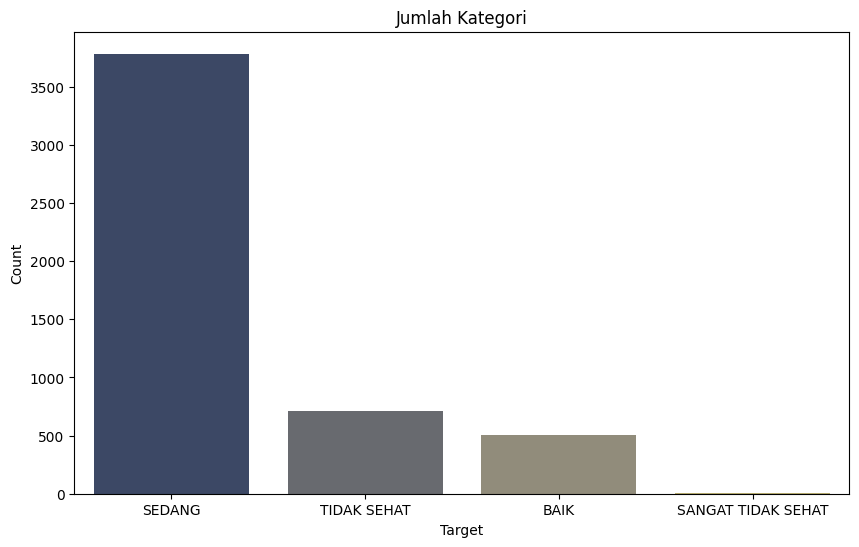

In [9]:
# Create the barplot
item = df['categori'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=item.index, y=item.values, palette='cividis')
plt.title('Jumlah Kategori')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [10]:
# Membuat peta untuk mengkonversi kategori menjadi angka ordinal
kategori_to_ordinal = {
    'BAIK': 3,
    'SEDANG': 2,
    'TIDAK SEHAT': 1,
    'SANGAT TIDAK SEHAT': 0
}

# Mengaplikasikan pemetaan ke kolom 'kategori'
df['categori'] = df['categori'].map(kategori_to_ordinal)

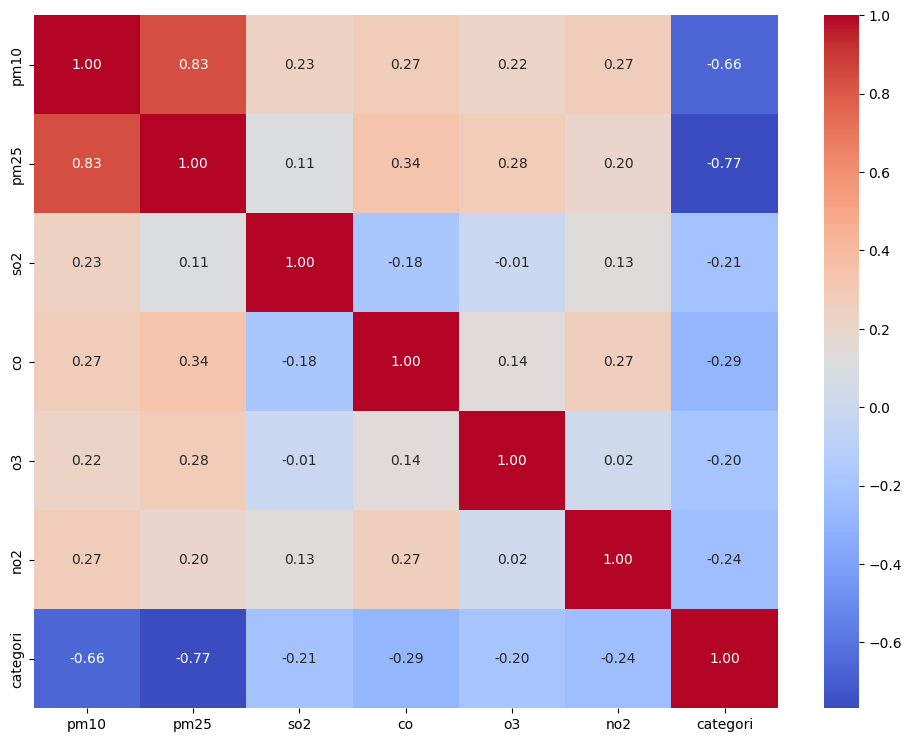

In [13]:
plt.figure(figsize=(12, 9))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

# **Drop Missing values**

In [14]:
df.dropna(inplace=True)
df.shape

(4152, 7)

In [15]:
df.isna().sum()

,0
pm10,0
pm25,0
so2,0
co,0
o3,0
no2,0
categori,0


In [17]:
df[['pm10', 'pm25', 'so2', 'co', 'o3', 'no2']] = df[['pm10', 'pm25', 'so2', 'co', 'o3', 'no2']].astype(int)

In [18]:
df.to_csv("udara_jakarta_2021-2024.csv", sep=",", index=False)

# **Conclusion**

Setelah dilakukan percobaan melakukan imputasi menggunakan KNNImputer dan drop missing values, 
didapati hasil K-FOld Cross validation dengan fold sebanyak 10 adalah sebagai berikut.

4152 (Drop Missing Values): 
KNN -> Mean Accuracy: 0.961 dan SD Accuracy: 0.007
SVM -> Mean Accuracy: 0.972 dan SD Accuracy: 0.005
5052 (Imputasi KNNImputer):
KNN -> Mean Accuracy: 0.944 dan SD Accuracy: 0.011
SVM -> Mean Accuracy: 0.944 dan SD Accuracy: 0.011